In [0]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

#### Single Output Regression Analysis
(Queremos prever o total de vendas ao longo dos anos)

In [0]:
# Carrega dos dados
dados = pd.read_csv(r"/dbfs/FileStore/shared_uploads/eric.passos@dataside.com.br/dataset-17.csv")

# Shape
print(dados.shape)

# Colunas
dados.columns

(18, 6)
Out[3]: Index(['Ano', 'Periodo', 'Total_Vendas',
 'Percentual_Aumento_Vendas_Ano_Anterior', 'Total_Unidades_Vendidas',
 'Percentual_Aumento_Unidades_Ano_Anterior'],
 dtype='object')

In [0]:
# Amostra dos dados
dados.head()

Out[4]:

,Ano,Periodo,Total_Vendas,Percentual_Aumento_Vendas_Ano_Anterior,Total_Unidades_Vendidas,Percentual_Aumento_Unidades_Ano_Anterior
0,2002,2002-03,19666.640,6.610000,3097,7.570000
1,2003,2003-04,20384.980,3.652581,3289,6.199548
2,2004,2004-05,20810.281,2.086345,3490,6.111280
3,2005,2005-06,21184.427,1.797890,3626,3.896848
4,2006,2006-07,21977.311,3.742768,3736,3.033646


##### Pré-Processamento dos Dados

In [0]:
# Extraindo a variável  ano (variável de entrada)
array_ano = dados["Ano"].values.reshape(-1,1)
array_ano

Out[5]: array([[2002],
 [2003],
 [2004],
 [2005],
 [2006],
 [2007],
 [2008],
 [2009],
 [2010],
 [2011],
 [2012],
 [2013],
 [2014],
 [2015],
 [2016],
 [2017],
 [2018],
 [2019]])

In [0]:
type(array_ano)

Out[6]: numpy.ndarray

In [0]:
# Extraindo o valor máximo e mínimo da coluna
max_f = max(array_ano)
min_f = min(array_ano)
print(max_f)
print(min_f)

[2019]
[2002]

In [0]:
# Pré-processamento (normalização com base nos valores max e min)
norm_features = preprocessing.minmax_scale(array_ano)
print(norm_features)

[[0. ]
 [0.05882353]
 [0.11764706]
 [0.17647059]
 [0.23529412]
 [0.29411765]
 [0.35294118]
 [0.41176471]
 [0.47058824]
 [0.52941176]
 [0.58823529]
 [0.64705882]
 [0.70588235]
 [0.76470588]
 [0.82352941]
 [0.88235294]
 [0.94117647]
 [1. ]]

No caso a cima, não será necessário a normalização dos dados. Pois serve apenas a título de exemplo.

In [0]:
# Variável de saída
label = dados["Total_Vendas"]

# Valores máximo e mínimo 
max_l = max(label)
min_l = min(label)
print(max_l)
print(min_l)

34700.115
19666.64

Se os dados não estiverem na mesma escala é uma boa prática aplicar normalização. Ou se o valor da variável alvo for muito alto. Nesse caso, é necessário normalizar, colocando os dados com limite entre 0 e 1, para evitar "estouro" de memória ram.

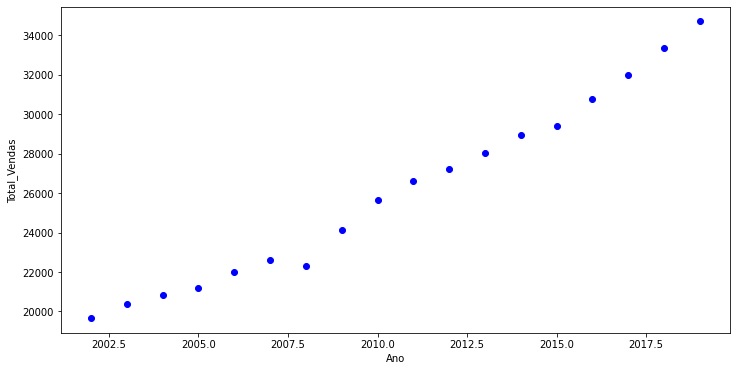

In [0]:
# Plot
plt.figure(figsize = (12, 6))
plt.scatter(dados['Ano'], dados['Total_Vendas'], c = 'blue')
plt.ylabel("Total_Vendas")
plt.xlabel("Ano")
plt.show()

In [0]:
# Normaliza o label
norm_label = preprocessing.minmax_scale(label)
print(norm_label)

[0. 0.0477827 0.07607296 0.10096049 0.15370172 0.19385092
 0.17603475 0.29651621 0.3991944 0.46235817 0.50342486 0.55629899
 0.61842934 0.6485011 0.73996638 0.82099794 0.91156502 1. ]

In [0]:
# Divide os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(norm_features, 
                                                       norm_label,
                                                       test_size = 0.075,
                                                       random_state = 3)

#### Modelo Single Output Regression

In [0]:
# Cria o modelo de regressão linear com single output
modelo_single_output = linear_model.LinearRegression()

# Treinamento
modelo_single_output.fit(x_treino, y_treino)

# Lista de anos para previsões
anos = [2020, 2021, 2022, 2023, 2024, 2025]

2020
[0.98805448]
[34520.53236724]
2021
[1.04707872]
[35407.87182586]
2022
[1.10610297]
[36295.21128448]
2023
[1.16512721]
[37182.5507431]
2024
[1.22415145]
[38069.89020172]
2025
[1.28317569]
[38957.22966034]

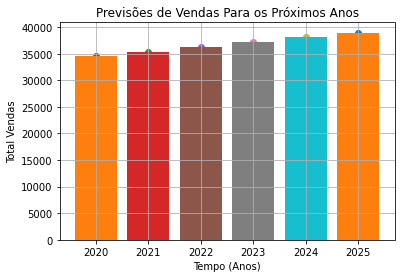

In [0]:
# Loop com as previsões
for i in anos:
  x = i
  print(x)
  
  #Normaliza os dados
  scaled_x = float((x - min_f) / (max_f - min_f))
  
  #Extrai o coeficiente do valor previsto
  coef = modelo_single_output.predict([[scaled_x]])
  print(coef)
  
  #Calcula a previsão desfazendo a normalização
  pred = coef * (max_l - min_l) + min_l
  y = pred
  print(y)
  
  #Plot
  plt.scatter(x, y)
  plt.bar(x, pred)
  plt.ylabel('Total Vendas')
  plt.xlabel('Tempo (Anos)')
  plt.grid(True)
  plt.title('Previsões de Vendas Para os Próximos Anos')

In [0]:
# Extrai as previsões do modelo
y_pred = modelo_single_output.predict(x_teste)

# Calcula a performance do modelo
df = pd.DataFrame({'Total Vendas Real':y_teste, 'Total Vendas Previsão':y_pred})
print("Valor Real x Valor Previsto:\n\n",df)

Valor Real x Valor Previsto:

 Total Vendas Real Total Vendas Previsão
0 0.556299 0.574885
1 0.076073 0.043667

In [0]:
# Score
score = modelo_single_output.score(x_teste, y_teste)

# Print
print("Precisão do Modelo:", (score * 100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

Precisão do Modelo: 98.78967908950257
Mean Absolute Error: 0.025496072185115272
Mean Squared Error: 0.0006978015610769276
Root Mean Squared Error: 0.026415933848284213

#### Multiple Output Regression Analysis

In [0]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [0]:
# Carregando os daos novamente
dados = pd.read_csv(r"/dbfs/FileStore/shared_uploads/eric.passos@dataside.com.br/dataset-17.csv")

# Shape
print(dados.shape)

# Colunas
dados.columns

(18, 6)
Out[32]: Index(['Ano', 'Periodo', 'Total_Vendas',
 'Percentual_Aumento_Vendas_Ano_Anterior', 'Total_Unidades_Vendidas',
 'Percentual_Aumento_Unidades_Ano_Anterior'],
 dtype='object')

In [0]:
dados.head()

Out[33]:

,Ano,Periodo,Total_Vendas,Percentual_Aumento_Vendas_Ano_Anterior,Total_Unidades_Vendidas,Percentual_Aumento_Unidades_Ano_Anterior
0,2002,2002-03,19666.640,6.610000,3097,7.570000
1,2003,2003-04,20384.980,3.652581,3289,6.199548
2,2004,2004-05,20810.281,2.086345,3490,6.111280
3,2005,2005-06,21184.427,1.797890,3626,3.896848
4,2006,2006-07,21977.311,3.742768,3736,3.033646


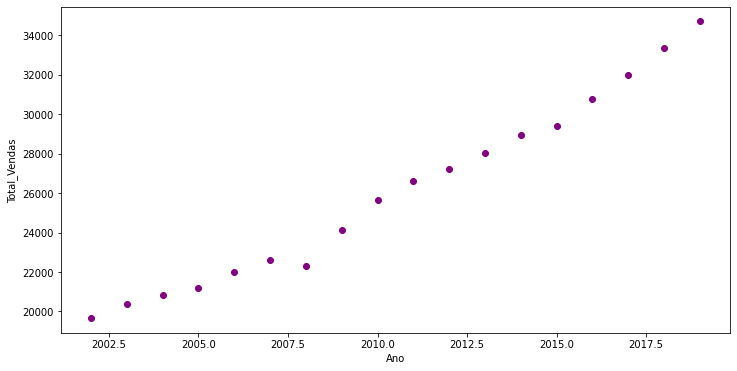

In [0]:
# Plot de Total_Vendas
plt.figure(figsize = (12, 6))
plt.scatter(dados['Ano'], dados['Total_Vendas'], c = 'purple')
plt.ylabel("Total_Vendas")
plt.xlabel("Ano")
plt.show()

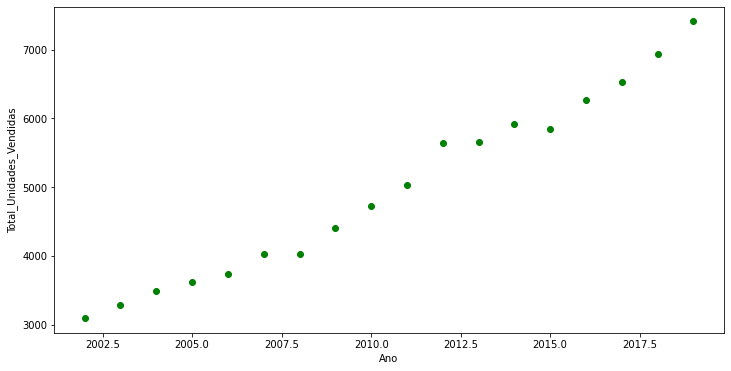

In [0]:
# Plot Total_Unidades_Vendidas
plt.figure(figsize = (12, 6))
plt.scatter(dados['Ano'], dados['Total_Unidades_Vendidas'], c = 'green')
plt.ylabel("Total_Unidades_Vendidas")
plt.xlabel("Ano")
plt.show()

In [0]:
# Extraí a variável preditora
X = dados["Ano"].values.reshape(-1,1)

# Entraí duas variáveis alvo
Y = dados.iloc[:, [2,4]]

# Print
print(Y)

Total_Vendas Total_Unidades_Vendidas
0 19666.640 3097
1 20384.980 3289
2 20810.281 3490
3 21184.427 3626
4 21977.311 3736
5 22580.893 4030
6 22313.054 4034
7 24124.309 4408
8 25667.919 4720
9 26617.490 5028
10 27234.865 5642
11 28029.747 5653
12 28963.782 5925
13 29415.865 5846
14 30790.906 6261
15 32009.092 6526
16 33370.630 6934
17 34700.115 7409

In [0]:
# Divisão em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.10, random_state = 4)

Vamos pular a padronização dos dados, para focar na modelagem preditiva.

#### Modelo MultiOutput Regressor

(obs. A função MultiOutputRegressor suporta vários modelos de regressão: KNN, Regressão Linear, Random Forest entre outros)

In [0]:
# Hiperparâmetros
max_depth = 30
num_estimadores = 100

# Cria o modelo
modelo_multioutput = MultiOutputRegressor(RandomForestRegressor(n_estimators = num_estimadores,
                                                                max_depth = max_depth,
                                                                random_state = 42))

# Treinamento
modelo_multioutput.fit(x_treino, y_treino)

# Previsão do modelo
y_pred = modelo_multioutput.predict(x_teste)

y_pred

Out[38]: array([[23045.39749, 4130.04 ],
 [21132.40174, 3550.66 ]])

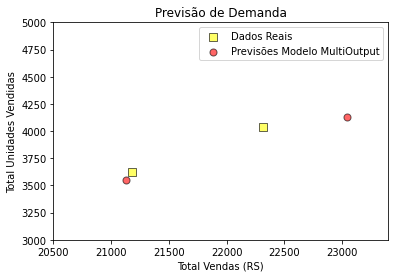

In [0]:
# Plot

# Cria a figura
plt.figure()

# Plot dos dados reais
plt.scatter(y_teste.iloc[:, 0].values,
           y_teste.iloc[:, 1].values,
           edgecolor = 'k',
           c = "yellow",
           s = 50,
           marker = 's',
           alpha = 0.6,
           label = "Dados Reais")

# Plot das previsões
plt.scatter(y_pred[:, 0],
           y_pred[:, 1],
           edgecolor = 'k',
           c = "red",
           s = 50,
           alpha = 0.6,
           label = "Previsões Modelo MultiOutput")

# Limites para o gráfico
plt.xlim([20500, 23400])
plt.ylim([3000, 5000])

# Labels do gráfico
plt.xlabel("Total Vendas (RS)")
plt.ylabel("Total Unidades Vendidas")
plt.title("Previsão de Demanda")
plt.legend()
plt.show()

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

Mean Absolute Error: 238.9371875000004
Mean Squared Error: 138483.35305585555
Root Mean Squared Error: 372.13351509351526

O resutlado esta nessa forma, pois os dados não foram normalizados.

In [0]:
print("\nx_teste\n", x_teste)
print("\nY_teste\n", y_teste)
print("\ny_pred\n", y_pred)

x_teste
 [[2008]
 [2005]]

Y_teste
 Total_Vendas Total_Unidades_Vendidas
6 22313.054 4034
3 21184.427 3626

y_pred
 [[23045.39749 4130.04 ]
 [21132.40174 3550.66 ]]

#### Observações Finais
Esse tipo de modelo não é fácil de ajustar, pois alterar a variável preditora pode melhor o y1, mas piorar o y2. Conseguir chegar em um equilibrio, não é tarefa fácil. Ademais, o resultado foi bom por conta dos dados serem fictícios, para dados reais o resultado pode não ser satisfatório justamente por conta da complexidade do ajuste para esses casos.